TEXT CLUSTERING in NLP USING VARIOUS TECHNIQUES

Text clustering is the process of grouping similar documents or pieces of text into clusters or categories.
Text clustering includes :
1. discoverring hidden patterns
2. extracting  valuable insights
3. streamlining of large volumes of unstructured text data

Text clustering is a type of text analysis and it is an extremely essential step while formatting insights from unstructured data items.

Features of text clustering in NLP include:
information retrieval.
topic discovery.
content organization.
sentiment analysis.

Here kmeans algorithm is used which is a widely used text clustering technique.
It assigns documents to clusters by minimizing the distance between the document and the clusters centroid. Each cluster represents a group of similar documents.

In [14]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd


# loading the dataset
matches = pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [15]:
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [23]:
# Vectorize the text data using TF-IDF
# using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the text data into numerical features

tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(matches)

In [5]:
# LSA (Latent Semantic Analysis) is used for dimensionality reduction to 2D for visualization purposes
lsa = TruncatedSVD(n_components=2)

lsa_matrix = lsa.fit_transform(tfidf_matrix)

In [7]:
# Perform K-Means clustering
k = 5

# K-Means clustering is performed with the number of clusters equal to the number of  categories (k = any number)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lsa_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [8]:
# Visualize the clusters
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

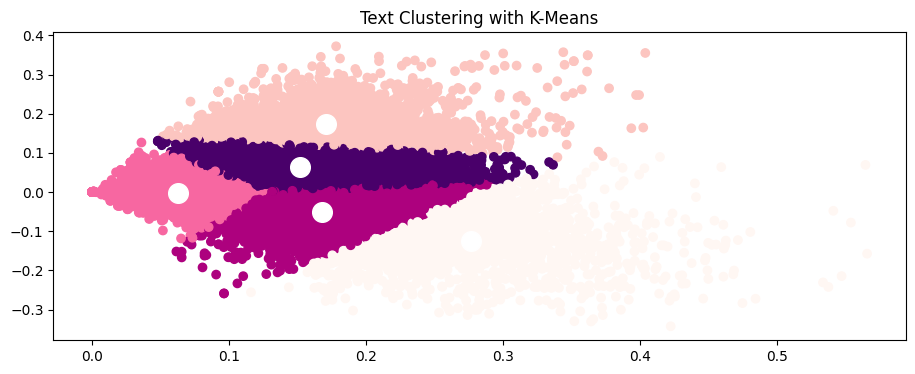

In [21]:
# we plot the text documents in a 2D space and color them based on the clusters. Red dots represent cluster centers.

plt.figure(figsize=(11,4))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='RdPu')
#  cmap colors can be as ==  'viridis', 'plasma', 'inferno', 'magma', 'cividis',
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
# 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
# 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'


plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='white')
plt.title("Text Clustering with K-Means")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


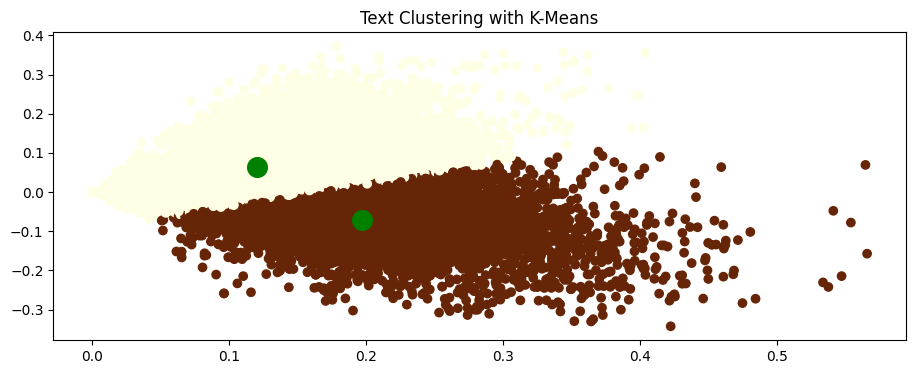

In [25]:
# for 2 clusters
k = 2


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lsa_matrix)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(11,4))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='YlOrBr')
#  cmap colors can be as ==  'viridis', 'plasma', 'inferno', 'magma', 'cividis',
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
# 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
# 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'


plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='green')
plt.title("Text Clustering with K-Means")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


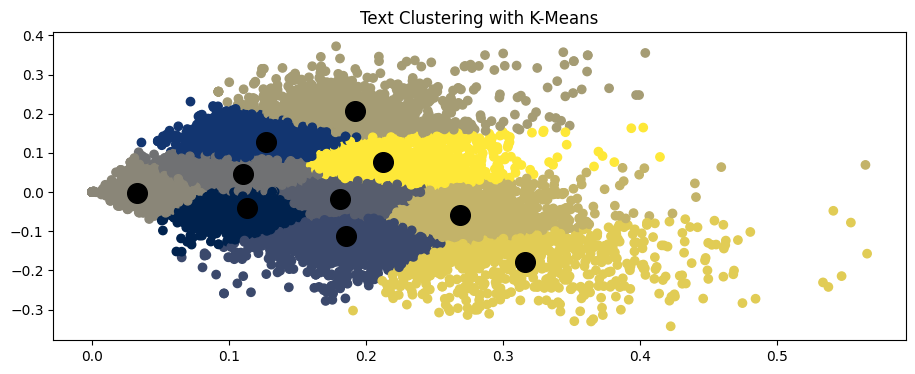

In [29]:
# for max clusters eg. 10
k = 10


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lsa_matrix)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(11,4))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='cividis')
#  cmap colors can be as ==  'viridis', 'plasma', 'inferno', 'magma', 'cividis',
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
# 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
# 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'


plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='black')
plt.title("Text Clustering with K-Means")
plt.show()